In [2]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [3]:
def toInt(a):
    return [int(x) for x in a]

In [4]:
def hist(a):
    k = round(1 + math.log(a.size, 2))
    delta =  int(((a[-1] - a[0]) + k - (a[-1] - a[0]) % k)/k)
    segments = []
    for i in [a[0] + j * delta for  j in range(k)]:
        segments.append(i)
    segments.append(a[0] + k * delta)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    
    hist, bins= np.histogram(a, bins = segments)
    center = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]
    hist = [x / delta/a.size for x in hist]
    plt.bar(center, hist, align='center', width=width, color = 'lightblue' ,edgecolor = 'black')
    plt.xlim(segments[0] - 1, segments[-1] + 1)
    plt.grid(True)
    plt.xticks(segments)
    
    plt.show()

In [5]:
def bootStrap(a):
    alpha = []
    for i in range(1000):
        al = 0
        for j in range(a.size):
            al += a[rnd.randint(0, a.size - 1)]
        alpha.append(al / a.size)
    hist(np.sort(np.array(alpha)))

In [17]:
def median(a):
    x = 0;
    for i in a:
        x += i
    return x / a.size

In [27]:
def reach(a):
    b = a[-1] - a[0]
    return b

In [49]:
def mode(a):
    d = {}
    for i in a:
        if(d.get(i) == None):
            d[i] = 1
        else:
            d[i] = d[i] + 1
    max = d[a[0]]
    for i in d.values():
        if(max < i):
            max = i
    answ = []
    for i in d.items():
        if(i[1] == max):
            answ.append(i[0])
    return answ

[0.82632042 0.56662009 0.86002002 0.02678311 0.88793525 0.0138518
 1.33253345 0.57112207 1.93191923 1.55572328 0.6081748  0.84416898
 0.19569575 1.14488377 0.40925878 0.32616591 0.36167867 3.00881608
 1.67035848 0.9971506  0.92553445 3.5091755  0.01874784 1.03545718
 0.01926392]
-------------------------------------------------------------------
Моды : 
[0.8263204227821499, 0.5666200915603276, 0.8600200200227052, 0.02678311228179375, 0.8879352472156999, 0.013851803770930949, 1.3325334540290152, 0.5711220694120283, 1.9319192320318195, 1.5557232845777413, 0.608174804136952, 0.8441689804095447, 0.19569575274863182, 1.1448837719647134, 0.4092587821100926, 0.3261659148513486, 0.3616786674325786, 3.0088160783963995, 1.6703584756452206, 0.9971505986360518, 0.925534453935659, 3.509175500505798, 0.018747844098803854, 1.0354571821741576, 0.01926392073967158]
-------------------------------------------------------------------
Медиана -  0.9458943786187932
Размах -  3.495323696734867


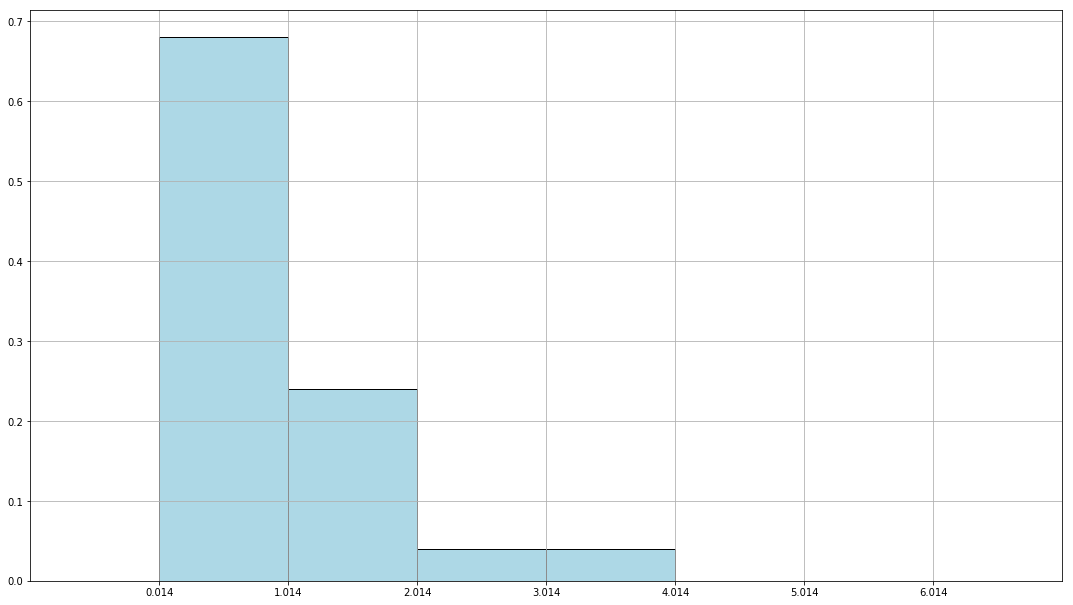

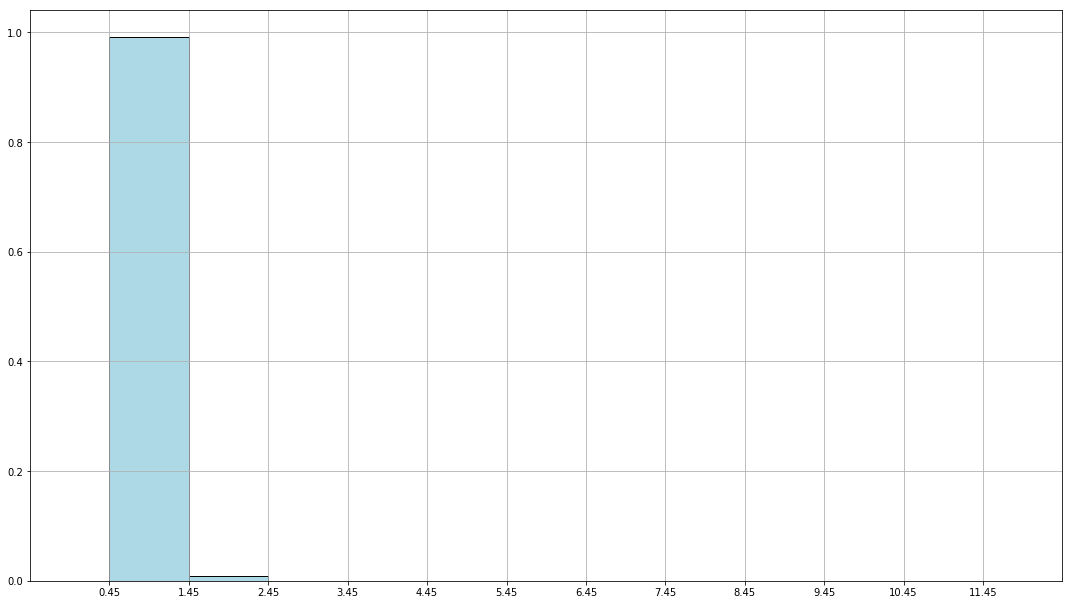

In [52]:
exp = np.array([])
for i in range (25):
    exp = np.append(exp, rnd.expovariate(1))
print(exp)
print("-------------------------------------------------------------------")
print("Моды : ")
print(mode(exp))
print("-------------------------------------------------------------------")
print("Медиана - ", median(exp))
print("Размах - ", reach(np.sort(exp)))
hist(np.sort(exp))
bootStrap(np.sort(exp))